In [1]:
import csv

data = None
prices = []
loads = []
with open('../historical_data/Binance_BTCUSDT_1s.csv', newline='') as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    cnt = 0
    for row in data:
        if cnt == 0:
            cnt += 1
            continue
        prices.append(float(row[0]))
        loads.append(int(row[1]))
        

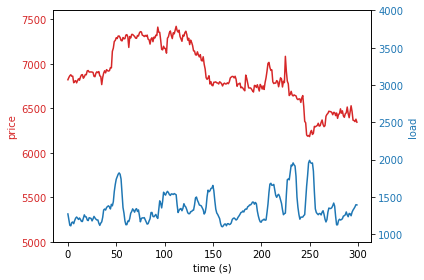

In [2]:
import matplotlib.pyplot as plt
import numpy as np
    
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('price', color=color)
ax1.plot(prices[200:500], color=color)
ax1.set_ylim([5000, 7600])
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('load', color=color)  # we already handled the x-label with ax1
ax2.plot(loads[200:500], color=color)
#ax2.plot(buffer_size[200:500], color='tab:orange')
ax2.set_ylim([900, 4000])
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.rcParams["figure.figsize"] = (15, 5)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
    
fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('buffer_load', color=color)
ax1.plot(buffer_size[200:500], color=color)
ax1.set_ylim([0, 2500])
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('market_load', color=color)  # we already handled the x-label with ax1
ax2.plot(rolling_mean[200:500], color=color)
#ax2.plot(buffer_size[200:500], color='tab:orange')
ax2.set_ylim([0, 2500])
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.rcParams["figure.figsize"] = (15, 5)
plt.show()


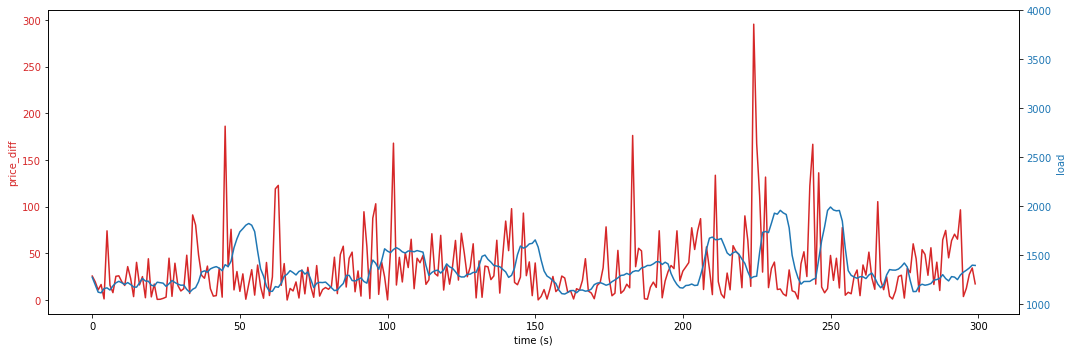

In [3]:
prices_diff = []

for i in range(len(prices) - 1):
    prices_diff.append(abs(prices[i + 1] - prices[i]))
    
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('price_diff', color=color)
ax1.plot(prices_diff[200:500], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('load', color=color)  # we already handled the x-label with ax1
ax2.plot(loads[200:500], color=color)
#ax2.plot(buffer_size[200:500], color='tab:orange')
ax2.set_ylim([900, 4000])
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.rcParams["figure.figsize"] = (15, 5)
plt.show()

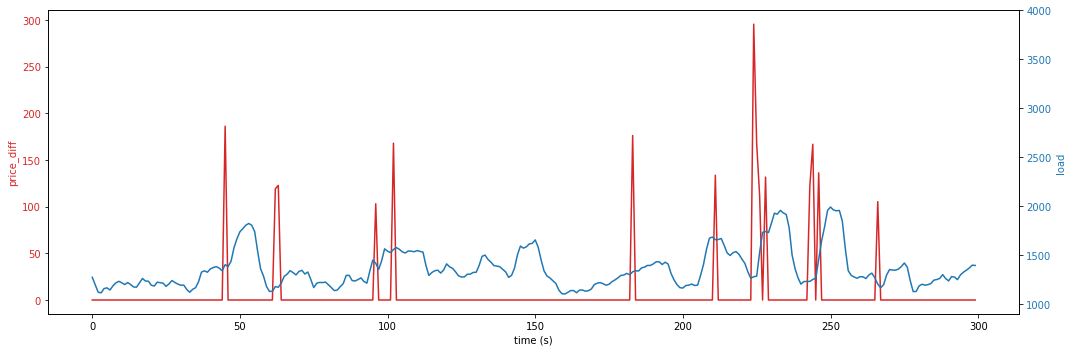

In [11]:
prices_diff = []

for i in range(len(prices) - 1):
    diff = abs(prices[i + 1] - prices[i])
    if diff > 100:
        prices_diff.append(diff)
    else:
        prices_diff.append(0)
    
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('price_diff', color=color)
ax1.plot(prices_diff[200:500], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('load', color=color)  # we already handled the x-label with ax1
ax2.plot(loads[200:500], color=color)
#ax2.plot(buffer_size[200:500], color='tab:orange')
ax2.set_ylim([900, 4000])
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.rcParams["figure.figsize"] = (15, 5)
plt.show()

In [28]:
# AR example
from statsmodels.tsa.arima_model import ARMA

def predict_next_load_level(history):
    model = ARMA(history, order=(2, 0, 0))
    model_fit = model.fit(disp=False)
    
    return model_fit.predict(5, 5)[-1]
    
predicted_diff = []
for i in range(200, 520):
    predicted_diff.append(max(predict_next_load_level(prices_diff[max(0, i - 25):i]), 0))


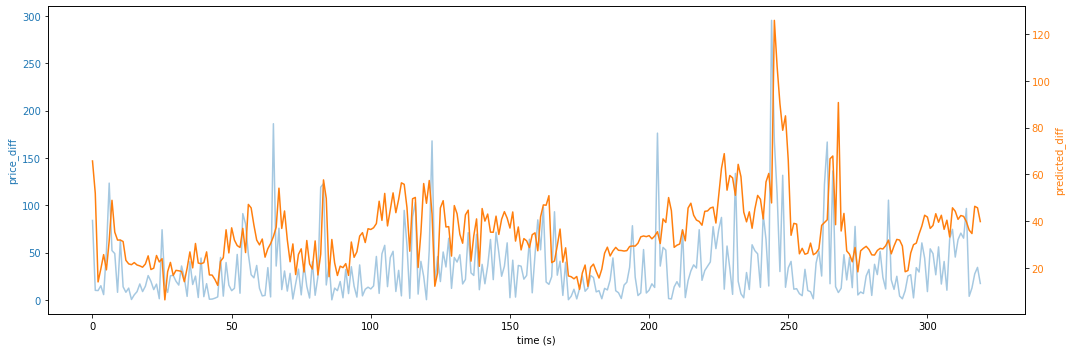

In [160]:
    
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('price_diff', color=color)
ax1.plot(prices_diff[180:500], color=color, alpha=0.4)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('predicted_diff', color=color)  # we already handled the x-label with ax1
ax2.plot(predicted_diff, color=color)
#ax2.plot(buffer_size[200:500], color='tab:orange')
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.rcParams["figure.figsize"] = (15, 5)
plt.show()

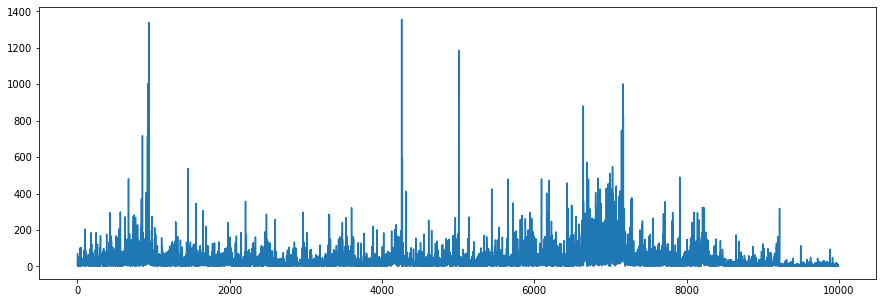

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 32)                1184      
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________
1898.5452075195312


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

# convert into dataset matrix
def convertToMatrix(data, step):
 X, Y =[], []
 for i in range(len(data)-step):
  d=i+step  
  X.append(data[i:d,])
  Y.append(data[d,])
 return np.array(X), np.array(Y)

step = 4
N = 1000    
Tp = 800    

t=np.arange(0,N)
x=prices_diff
df = pd.DataFrame(x)
df.head()

plt.plot(df)
plt.show()

values=df.values
train,test = values[0:Tp,:], values[Tp:N,:]


test = np.append(test,np.repeat(test[-1],step))
train = np.append(train,np.repeat(train[-1],step))
 
trainX,trainY =convertToMatrix(train,step)
testX,testY =convertToMatrix(test,step)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,step), activation="relu"))
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

model.fit(trainX,trainY, epochs=100, batch_size=16, verbose=0)
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore)


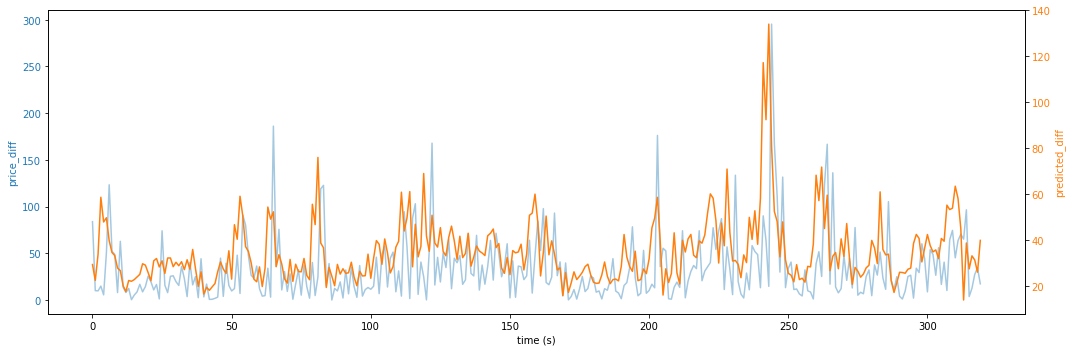

In [12]:
    
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('price_diff', color=color)
ax1.plot(prices_diff[180:500], color=color, alpha=0.4)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('predicted_diff', color=color)  # we already handled the x-label with ax1
ax2.plot(predicted[180:500], color=color)
#ax2.plot(buffer_size[200:500], color='tab:orange')
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.rcParams["figure.figsize"] = (15, 5)
plt.show()

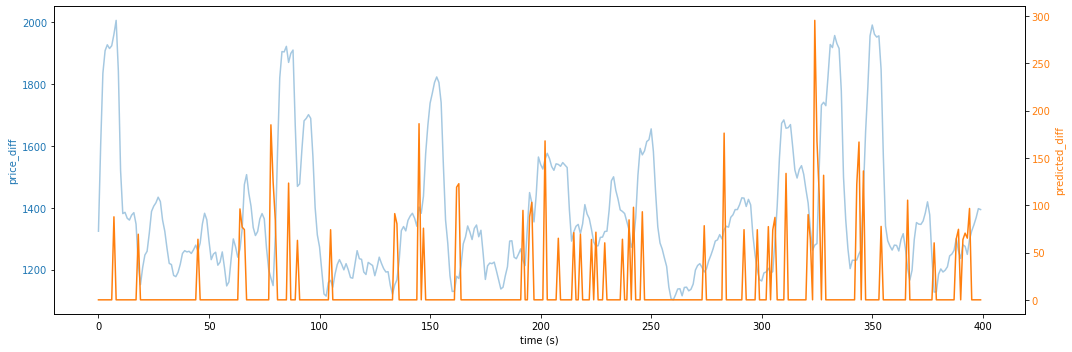

In [25]:
def extract_signals(diffs, threashold):
    result = []
    for d in diffs:
        if d >= threashold:
            result.append(d)
        else:
            result.append(0)
    return result
            
rnn_signals = extract_signals(predicted, 60)
load_signals = extract_signals(loads, 1500)

    
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('price_diff', color=color)
ax1.plot(load_signals[100:500], color=color, alpha=0.4)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('predicted_diff', color=color)  # we already handled the x-label with ax1
ax2.plot(rnn_signals[100:500], color=color)
#ax2.plot(buffer_size[200:500], color='tab:orange')
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.rcParams["figure.figsize"] = (15, 5)
plt.show()

In [44]:
from sklearn.metrics import f1_score

def calc_f_score(prediction, real):
    prediction = prediction[:500]
    real = real[:500]
    p_result = []
    cnt1 = 0
    cnt2 = 0
    for i in range(len(real)):
        if real[i] > 0:
            cnt1 += 1
            real[i] = 1
            ok = 0
            for j in range(max(0, i - 10), min(i, len(prediction))):
                if prediction[j] > 0:
                    cnt2 += 1
                    ok = 1
                    break
            p_result.append(ok)
        else:
            p_result.append(0)
    
    # print(cnt1, cnt2)
    return f1_score(real, p_result, average='macro')
        

for p in range(40, 100, 10):
    #print("p:", p)
    arma_score = calc_f_score(extract_signals(predicted_diff, p), extract_signals(loads, 1500))
    rnn_score = calc_f_score(extract_signals(predicted, p), extract_signals(loads, 1500))
    print(p, "&", arma_score, "&", rnn_score, "\\\\")

40 & 0.7186161638321616 & 0.9896103896103896 \\
50 & 0.6029361263736264 & 0.9716513111268604 \\
60 & 0.5474908366894429 & 0.8421926910299002 \\
70 & 0.5474908366894429 & 0.7760177752293578 \\
80 & 0.5474908366894429 & 0.6681949806949807 \\
90 & 0.5474908366894429 & 0.6029361263736264 \\
